In [1]:
import os
import nibabel as nib
import numpy as np

import matplotlib.pyplot as plt

File: C:\Users\Student11\Documents\git\MedImaging\mi2025_t03\MI2022_TeamWork_data\artif_01_bold.nii.gz
Nb of dimensions: 4
Shape: (72, 72, 36, 836)
x = left (0)   |   right (72)
y = anterior/behind skull (0)  |   posterior/front/eye (72)
z = bottom/base neck (0)   |   top/top skull (36)
v = nb of volumes (0)   |   nb of time points (836)
Voxel size: (np.float32(3.0), np.float32(3.0), np.float32(3.75), np.float32(0.0))
Affine:
[[-3.00000000e+00  0.00000000e+00  0.00000000e+00  1.04385544e+02]
 [ 0.00000000e+00  2.99851966e+00 -1.17790341e-01 -9.14410782e+01]
 [ 0.00000000e+00  9.42322612e-02  3.74814963e+00 -4.17823143e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Data type: float64
Min: 0.0, Max: 45181.99806690216, Mean: 3196.432537755791


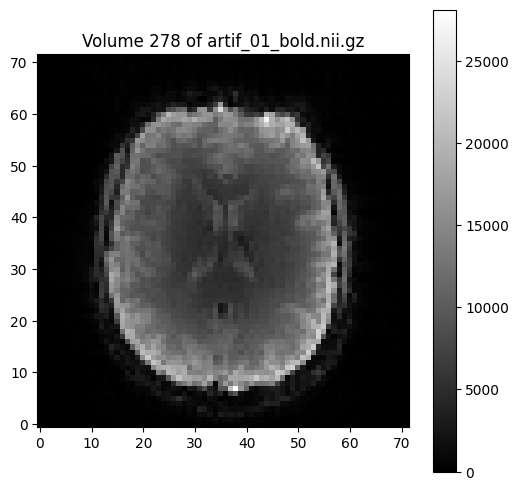

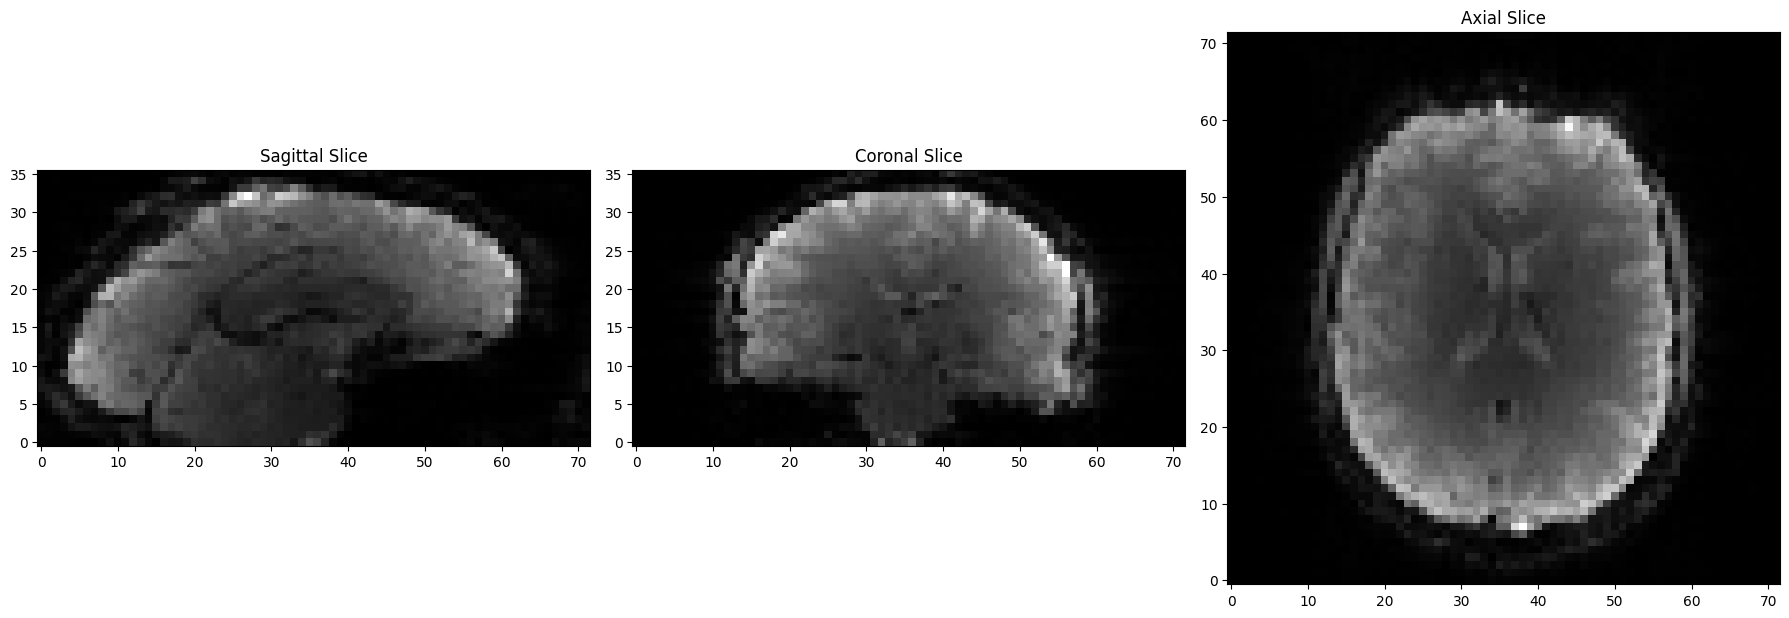

In [2]:
folder_path = r'C:\Users\Student11\Documents\git\MedImaging\mi2025_t03\MI2022_TeamWork_data'

# List all .nii.gz files in the folder
nii_files = [f for f in os.listdir(folder_path) if f.endswith('.nii.gz')]

# Process each file
for file in nii_files:
    file_path = os.path.join(folder_path, file)
    
    
    # Load the .nii.gz file
    img = nib.load(file_path)
    data = img.get_fdata()
    
    # Display basic information
    print(f"File: {file_path}")
    # taking up view
    print(f"Nb of dimensions: {data.ndim}")
    print(f"Shape: {data.shape}")
    print(f"x = left (0)   |   right ({data.shape[0]})")
    print(f"y = anterior/behind skull (0)  |   posterior/front/eye ({data.shape[1]})")
    print(f"z = bottom/base neck (0)   |   top/top skull ({data.shape[2]})")
    print(f"v = nb of volumes (0)   |   nb of time points ({data.shape[3]})")
    
    print(f"Voxel size: {img.header.get_zooms()}")
    print(f"Affine:\n{img.affine}")
    print(f"Data type: {data.dtype}")
    print(f"Min: {np.min(data)}, Max: {np.max(data)}, Mean: {np.mean(data)}")
    
    # Plot a middle slice (assuming 3D data)
    volume_index = data.shape[3] // 3
    middle_slice = data[:, :, data.shape[2]//2, volume_index]
    plt.figure(figsize=(6, 6))
    plt.imshow(middle_slice.T, cmap='gray', origin='lower')
    plt.title(f"Volume {volume_index} of {file}")
    plt.colorbar()
    plt.show()
    
    # Plot axial, sagittal, and coronal cuts
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))


    # Sagittal cut (x-axis)
    sagittal_slice = data[data.shape[0] // 2, :, :, 0]
    axes[0].imshow(sagittal_slice.T, cmap='gray', origin='lower')
    axes[0].set_title('Sagittal Slice')

    # Coronal cut (y-axis)
    coronal_slice = data[:, data.shape[1] // 2, :, 0]
    axes[1].imshow(coronal_slice.T, cmap='gray', origin='lower')
    axes[1].set_title('Coronal Slice')
    
    # Axial cut (z-axis)
    axial_slice = data[:, :, data.shape[2] // 2, 0]
    axes[2].imshow(axial_slice.T, cmap='gray', origin='lower')
    axes[2].set_title('Axial Slice')

    plt.tight_layout()
    plt.show()
    
    break

In [44]:
# choose one dimension
data_plot = data[data.shape[0] // 2, :, :, :]
print(data_plot.shape) # (sagittal=72, axial=36, volume=836)

(72, 36, 836)


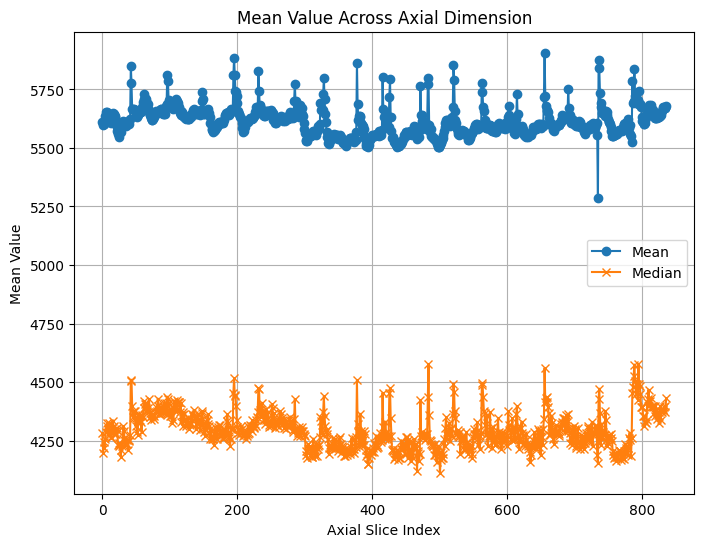

In [ ]:
# Calculate the mean value for this sagittal slice across all volumes
axial_means = data_plot.mean(axis=(0, 1))
axial_medians = np.median(data_plot, axis=(0, 1))


# Plot the mean values
plt.figure(figsize=(8, 6))
plt.plot(range(data_plot.shape[2]), axial_means, marker='o')
plt.plot(range(data_plot.shape[2]), axial_medians, marker='x')
plt.title('Mean Value Across Axial Dimension')
plt.xlabel('Axial Slice Index')
plt.ylabel('Mean Value')
plt.grid(True)
plt.legend(['Mean', 'Median'])
plt.show()

In [25]:
axial_medians =  np.array([np.median(data[i, :, :, :], axis=(0, 1)) for i in range(data.shape[0])])
print(axial_medians.shape) # (72, 2, 36)

(72, 836)


In [30]:
axial_means =  np.array([np.mean(data[i, :, :, :], axis=(0, 1)) for i in range(data.shape[0])])
print(axial_means.shape) # (72, 2, 36)

(72, 836)


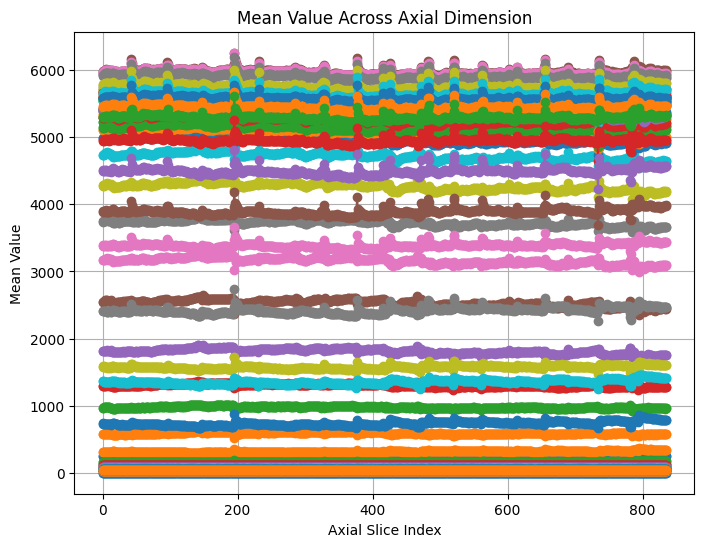

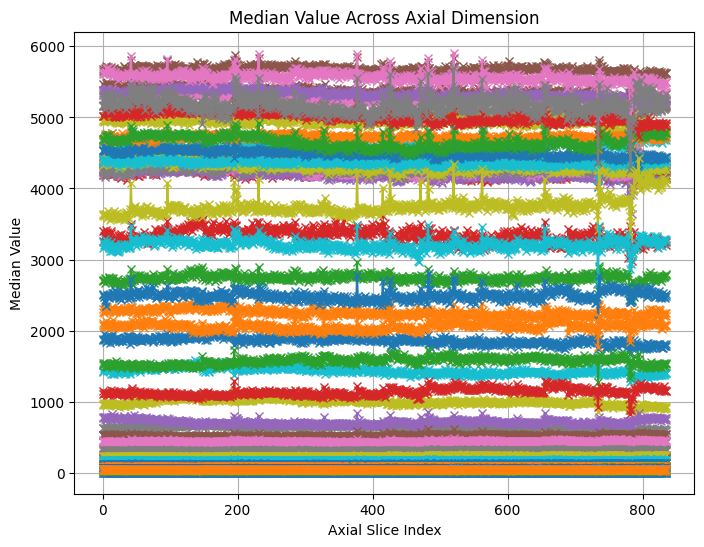

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(data.shape[0]):
    
    data_plot = data[i, :, :, :]
    # print(data_plot.shape) # (sagittal=72, coronal=72, axial=36)
    
    # Calculate the mean value along the sagittal and coronal dimensions for each axial slice
    axial_mean = axial_means[i, :]

    # Plot the mean values
    plt.plot(range(data_plot.shape[2]), axial_mean, marker='o')
    
plt.title('Mean Value Across Axial Dimension')
plt.xlabel('Axial Slice Index')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
for i in range(data.shape[0]):
    
    # take ith sagittal slice
    data_plot = data[i, :, :, :]
 
    axial_median = axial_medians[i, :]


    # Plot the mean values
    plt.plot(range(data_plot.shape[2]), axial_median, marker='x')
    
plt.title('Median Value Across Axial Dimension')
plt.xlabel('Axial Slice Index')
plt.ylabel('Median Value')
plt.grid(True)
plt.show()

(72, 36, 836)
(72, 36, 835)
(835,)
(835,)
Threshold Mean: 312.36165820244855
Std Mean: 142.91027669463364
Threshold Median: 140.90590883935064
Std Median: 48.75388654383852
Volume Min: 0.0, Volume Max: 39197.029344558716


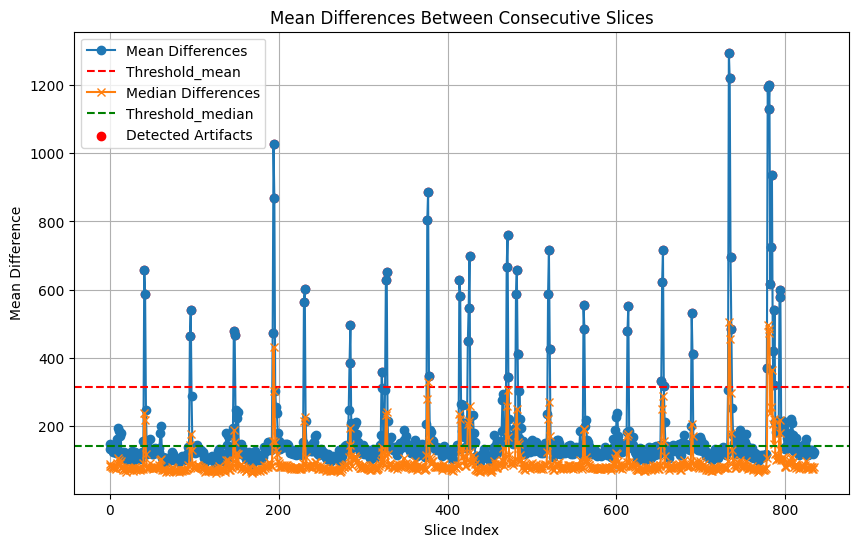

Artifact detected at slice 41 (Both)


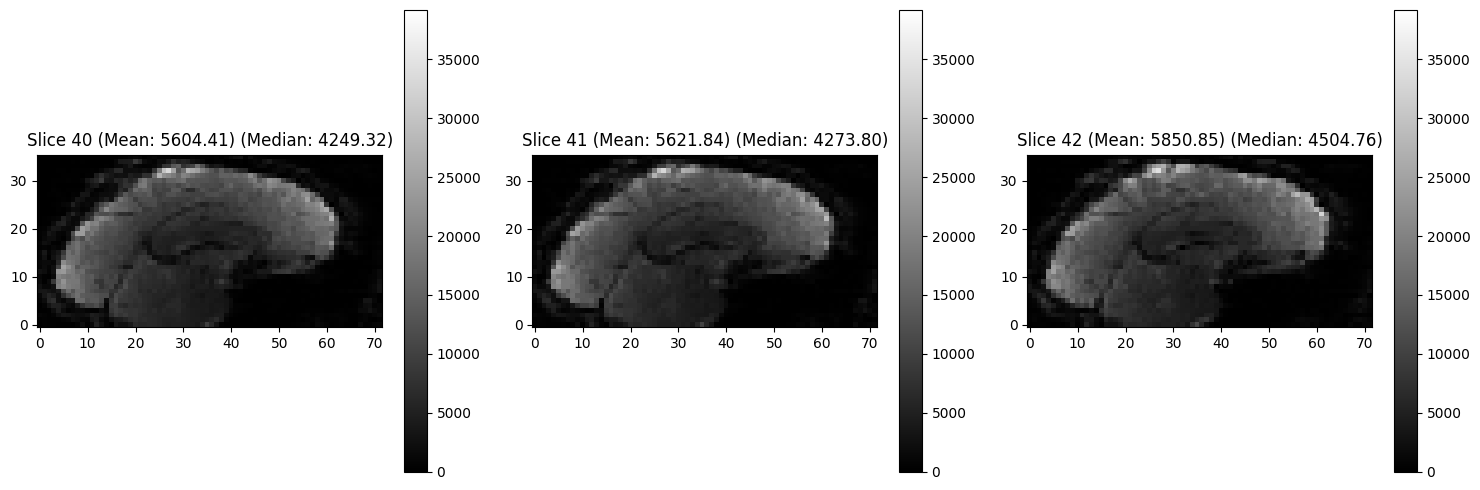

Artifact detected at slice 42 (Both)


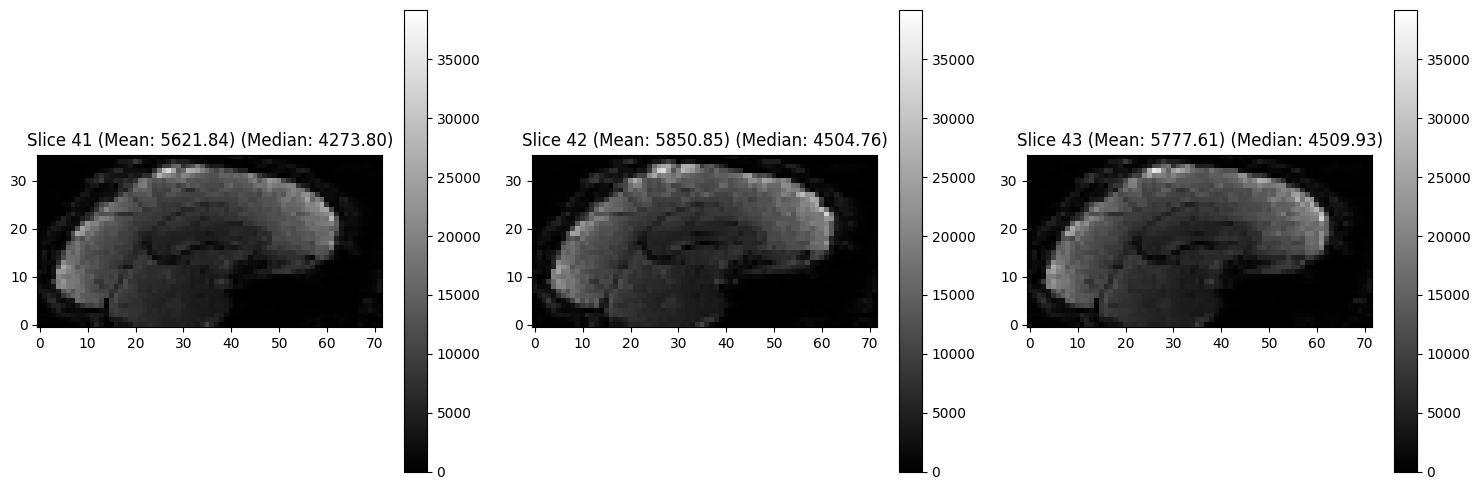

Artifact detected at slice 95 (Both)


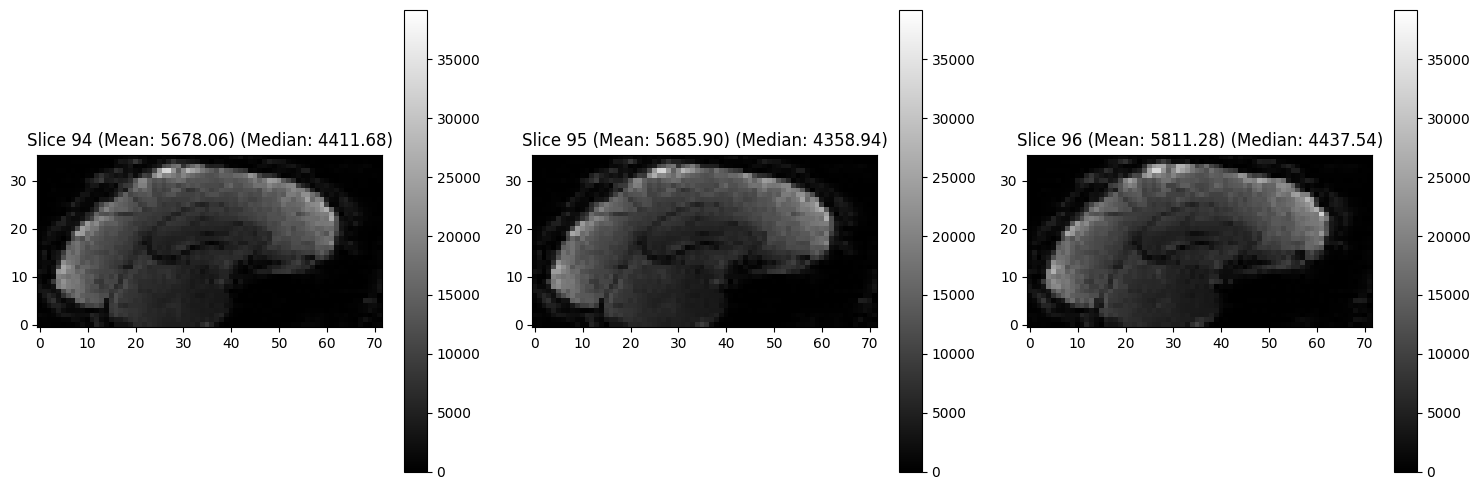

Artifact detected at slice 96 (Both)


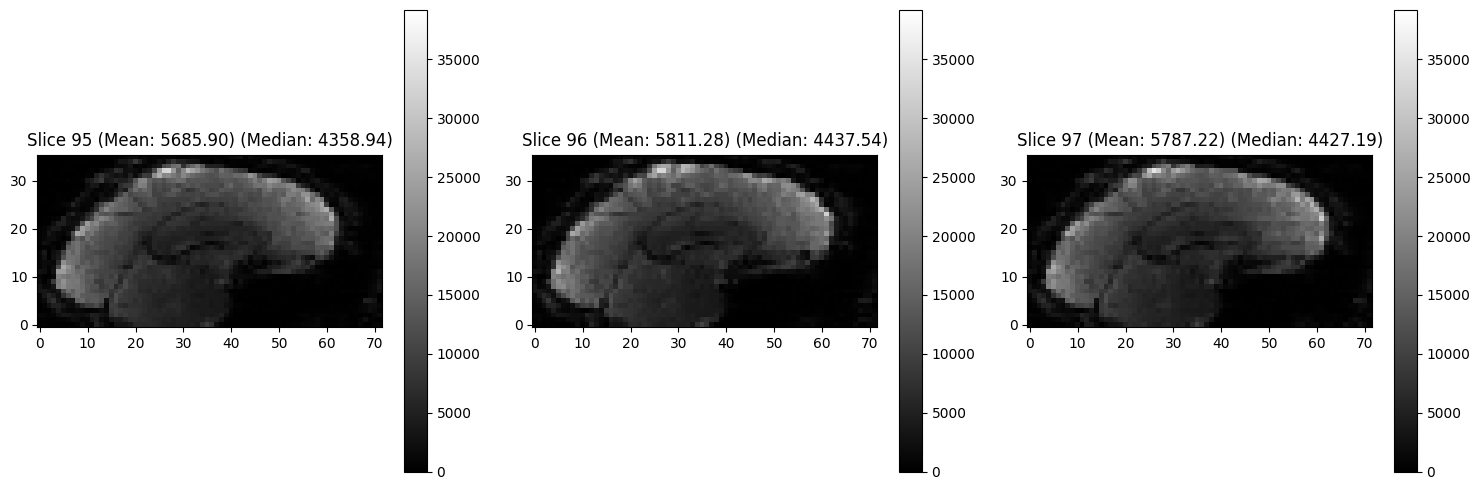

Artifact detected at slice 147 (Both)


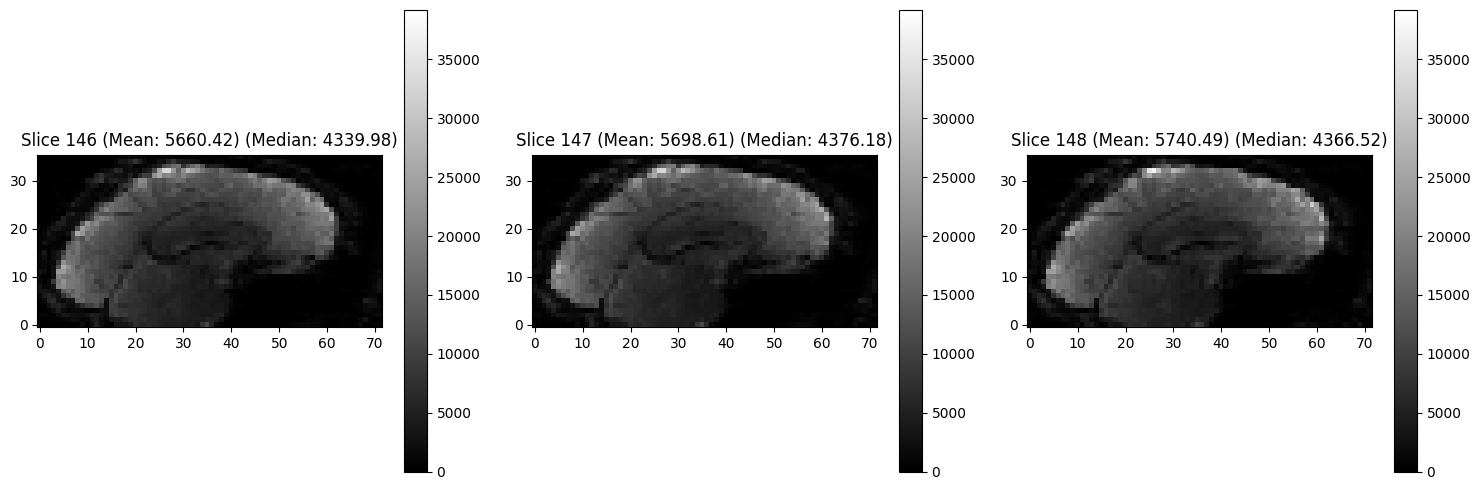

In [67]:
# Calculate the voxel-wise difference between consecutive slices
data_plot = data[data.shape[0] // 2, :, :, :]
print(data_plot.shape) # (sagittal=72, axial=36, volume=836)
slice_differences = np.abs(np.diff(data_plot, axis=2))
print(slice_differences.shape)

# Calculate the mean difference for each slice
mean_differences = slice_differences.mean(axis=(0, 1))
print(mean_differences.shape)

median_differences = np.median(slice_differences, axis=(0, 1))
print(median_differences.shape)

# Set a threshold_mean to detect artifacts (e.g., mean difference > 3 standard deviations above the mean)
threshold_mean = mean_differences.mean() + 1 * mean_differences.std()
artifact_slices_mean = np.where(mean_differences > threshold_mean)[0]
print(f"Threshold Mean: {threshold_mean}")
print(f"Std Mean: {mean_differences.std()}")

threshold_median = median_differences.mean() + 1 * median_differences.std()
artifact_slices_median = np.where(median_differences > threshold_median)[0]
print(f"Threshold Median: {threshold_median}")
print(f"Std Median: {median_differences.std()}")

volume_min = np.min(data_plot)
volume_max = np.max(data_plot)
print(f"Volume Min: {volume_min}, Volume Max: {volume_max}")

# Plot the mean differences to visualize the threshold_mean and detected artifacts
plt.figure(figsize=(10, 6))

plt.plot(range(len(mean_differences)), mean_differences, marker='o', label='Mean Differences')
plt.axhline(y=threshold_mean, color='r', linestyle='--', label='Threshold_mean')

plt.plot(range(len(median_differences)), median_differences, marker='x', label='Median Differences')
plt.axhline(y=threshold_median, color='g', linestyle='--', label='Threshold_median')

plt.scatter(artifact_slices_mean, mean_differences[artifact_slices_mean], color='red', label='Detected Artifacts')

plt.title('Mean Differences Between Consecutive Slices')
plt.xlabel('Slice Index')
plt.ylabel('Mean Difference')
plt.legend()
plt.grid(True)
plt.show()

# Plot the i-1, i, and i+1 slices for each detected artifact
for artifact_slice in np.concatenate((artifact_slices_mean, artifact_slices_median)):
    if artifact_slice in artifact_slices_mean and artifact_slice in artifact_slices_median:
        print(f"Artifact detected at slice {artifact_slice} (Both)")
    elif artifact_slice in artifact_slices_mean:
        print(f"Artifact detected at slice {artifact_slice} (Mean)")
    elif artifact_slice in artifact_slices_median:
        print(f"Artifact detected at slice {artifact_slice} (Median)")
    else:
        print(f"Artifact detected at slice {artifact_slice} (Unknown)")
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    if artifact_slice > 0 and artifact_slice - 1 < data_plot.shape[2]:
        im0 = axes[0].imshow(data_plot[:, :, artifact_slice - 1].T, cmap='gray', origin='lower', vmin=volume_min, vmax=volume_max)
        axes[0].set_title(f'Slice {artifact_slice - 1} (Mean: {data_plot[:, :, artifact_slice - 1].mean():.2f}) (Median: {np.median(data_plot[:, :, artifact_slice - 1]):.2f})')
        fig.colorbar(im0, ax=axes[0])
    else:
        axes[0].axis('off')
    
    if artifact_slice < data_plot.shape[2]:
        im1 = axes[1].imshow(data_plot[:, :, artifact_slice].T, cmap='gray', origin='lower', vmin=volume_min, vmax=volume_max)
        axes[1].set_title(f'Slice {artifact_slice} (Mean: {data_plot[:, :, artifact_slice].mean():.2f}) (Median: {np.median(data_plot[:, :, artifact_slice]):.2f})')
        fig.colorbar(im1, ax=axes[1])
    else:
        axes[1].axis('off')
    
    if artifact_slice + 1 < data_plot.shape[2]:
        im2 = axes[2].imshow(data_plot[:, :, artifact_slice + 1].T, cmap='gray', origin='lower', vmin=volume_min, vmax=volume_max)
        axes[2].set_title(f'Slice {artifact_slice + 1} (Mean: {data_plot[:, :, artifact_slice + 1].mean():.2f}) (Median: {np.median(data_plot[:, :, artifact_slice + 1]):.2f})')
        fig.colorbar(im2, ax=axes[2])
    else:
        axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    if artifact_slice >= 100:
        break

(72, 36, 836)
(2592, 836)
Threshold for filtering voxels: 8487.409375380881
Filtered voxels shape: (718, 836)


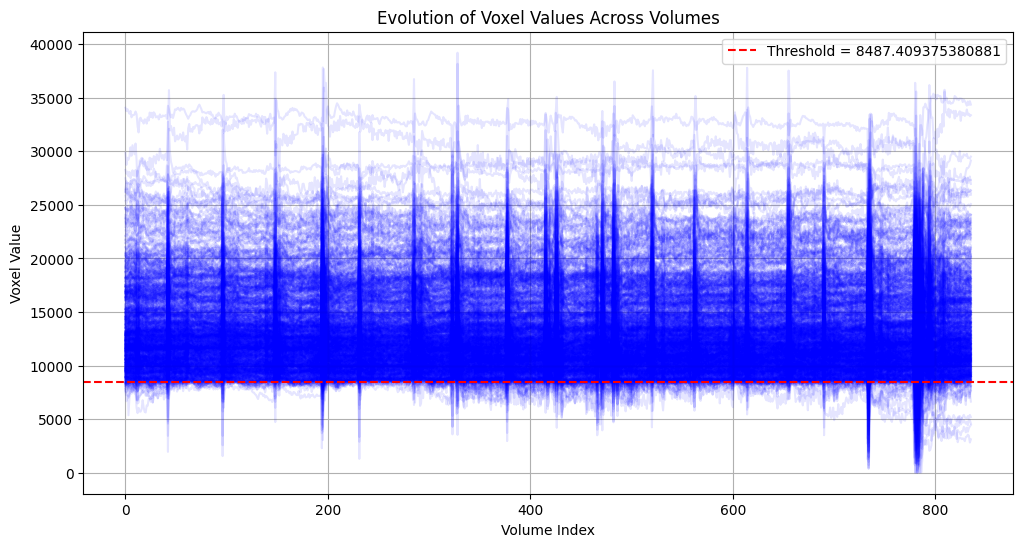

In [73]:
data_plot = data[data.shape[0] // 2, :, :, :]
print(data_plot.shape) # (sagittal=72, axial=36, volume=836)
flattened_data = data_plot.reshape(-1, data_plot.shape[2])
print(flattened_data.shape)  # Should print (72*72, 36)

# Calculate the mean of each voxel across volumes (dim=0)
voxel_means = flattened_data.mean(axis=1)

# Filter voxels with a mean above the threshold
threshold = 1.5 * voxel_means.std()
print(f"Threshold for filtering voxels: {threshold}")
filtered_voxels = flattened_data[voxel_means >= threshold]
print(f"Filtered voxels shape: {filtered_voxels.shape}")

# Plot the evolution of voxel values across the 836 volumes (dim=1)
plt.figure(figsize=(12, 6))
for voxel_idx in range(filtered_voxels.shape[0]):
    plt.plot(range(filtered_voxels.shape[1]), filtered_voxels[voxel_idx, :], alpha=0.1, color='blue')

# Plot the threshold line
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

plt.title('Evolution of Voxel Values Across Volumes')
plt.xlabel('Volume Index')
plt.ylabel('Voxel Value')
plt.legend()
plt.grid(True)
plt.show()